In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [6]:


# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


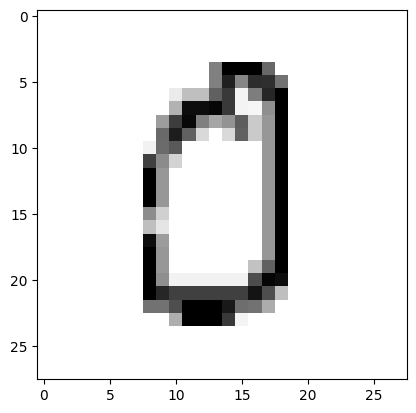

In [9]:
some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28)
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [10]:
y_train[90]

0

In [11]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [12]:
y_train[1].dtype

dtype('uint8')

#  function to find various parameters

In [14]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    # Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [15]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8016
Decision Tree F1-score: 0.800757138674452
Decision Tree Recall: 0.8016
Decision Tree ROC-AUC: 0.8897777777777778
Decision Tree Confusion Matrix:
[[728 140  12  50   5   6   2   7  30  20]
 [ 89 791   4  35   8  18   4   8  29  14]
 [ 10   2 930   8   8  19  12   5   1   5]
 [ 13  12  10 768  34  32  20  59  23  29]
 [  1   2   4  29 853  42  10   9  24  26]
 [  2   7   6  24 120 794  12   9  11  15]
 [  5   4   7  48  16  25 783  83   9  20]
 [ 21  10   4  67  27   8 152 655  15  41]
 [ 47  23   6   6   4  14  11   3 870  16]
 [ 15  34   3   6  27   4   8  10  49 844]]


In [16]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8764
Random Forest F1-score: 0.8758492432018234
Random Forest Recall: 0.8764
Random Forest ROC-AUC: 0.9895171944444445
Random Forest Confusion Matrix [[786 149   3  31   4   0   2   3  15   7]
 [ 30 908   0  26   3   5   0   4  16   8]
 [  3   2 980   2   0   6   1   3   1   2]
 [ 10  10   2 887  17  18  10  28  16   2]
 [  0   2   0  27 921  33   0   2   8   7]
 [  0   4   1   9 116 855   4   2   6   3]
 [  2   7   1  55  13  23 836  46   3  14]
 [  5  11   0  41  27   2 128 744  11  31]
 [ 16  13   1   3   3   6   1   0 954   3]
 [  6  11   0   4  21   1   6   3  55 893]]


In [19]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7725
Naive Bayes F1-score: 0.7711213320879671
Naive Bayes Recall: 0.7724999999999999
Naive Bayes ROC-AUC: 0.9722719333333332
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  65  21]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 843  33  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  13   5]
 [  5   9  50  30  25  44 730  94   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  35  26   6   4   3   2   4 823   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8815
K-NN F1-score: 0.8803983858970114
K-NN Recall: 0.8815000000000002
K-NN ROC-AUC: 0.9738883777777778
K-NN Confusion Matrix
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 887  20  22   4  15  26   4]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  43  21  10 841  65   0  14]
 [  7   8   0  52  34   3 167 699   6  24]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   7   0   0  24   0   7   5  29 923]]


In [17]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8869
SVM F1-score: 0.8863641990562918
SVM Recall: 0.8869
SVM ROC-AUC: 0.9925388777777778
SVM confusion Matrix
[[811 139   1  22   6   0   1   2  15   3]
 [ 19 924   0  27   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 886  20  23   7  27  18   0]
 [  0   1   0  14 947  23   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  50  20  22 844  40   0  13]
 [  6  13   0  33  17   4 135 747   7  38]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  23   0   6   3  40 913]]


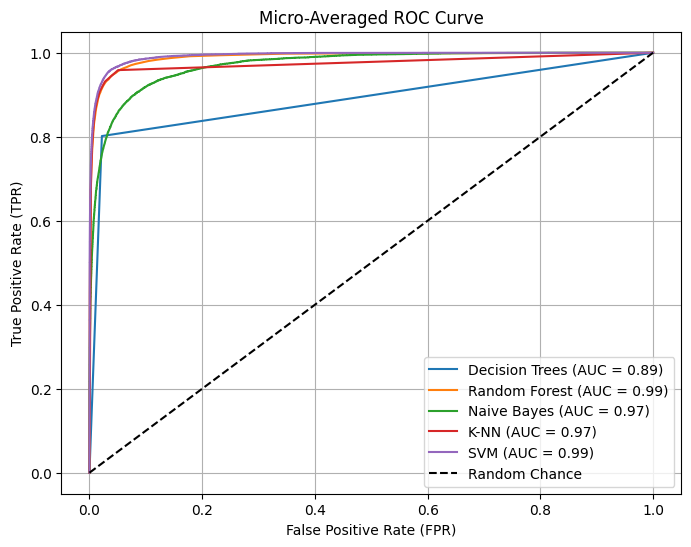

In [22]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

# For SVM
svm_pred_probs = svm_classifier.predict_proba(X_test_pca)
svm_fpr, svm_tpr, _ = roc_curve(y_test_bin.ravel(), svm_pred_probs.ravel())
svm_auc = auc(svm_fpr, svm_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

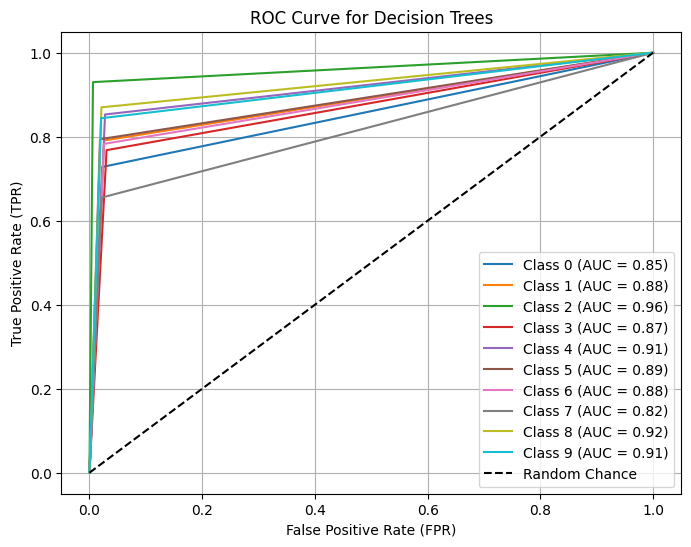

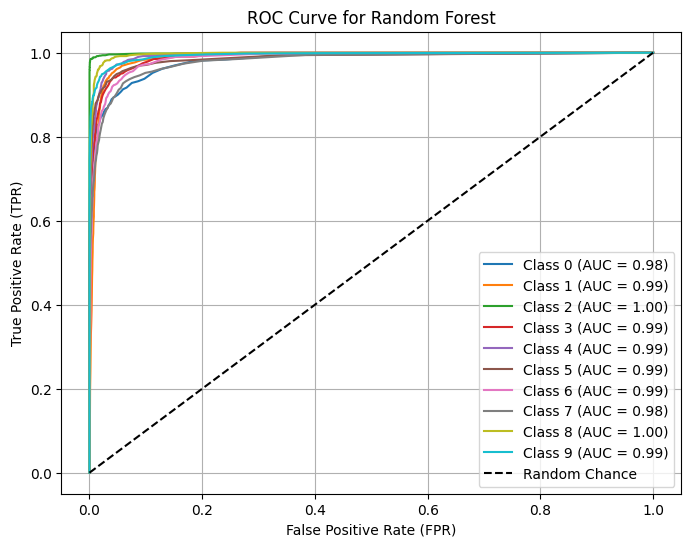

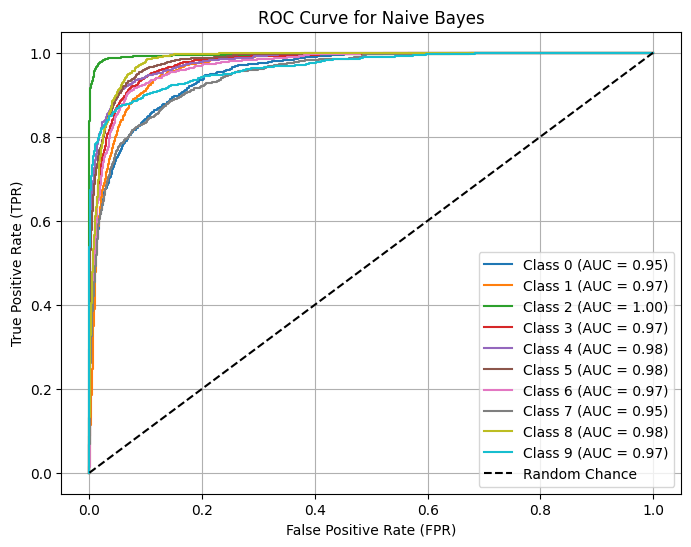

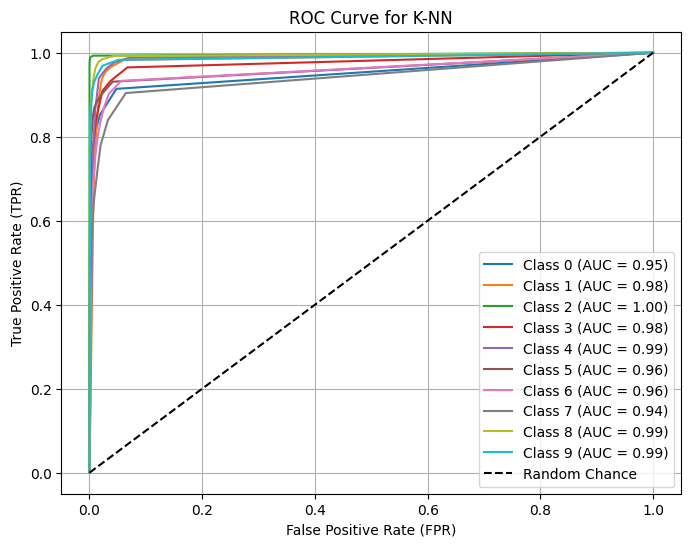

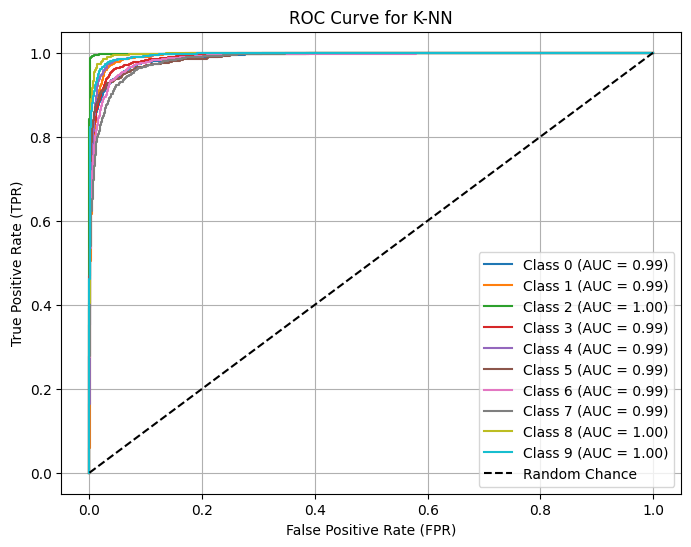

In [23]:
# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# For SVM
svm_fpr = dict()
svm_tpr = dict()
svm_auc = dict()
for class_idx in range(10):
    svm_pred_probs = svm_classifier.predict_proba(X_test_pca)[:, class_idx]
    svm_fpr[class_idx], svm_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], svm_pred_probs)
    svm_auc[class_idx] = auc(svm_fpr[class_idx], svm_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for SVM
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(svm_fpr[class_idx], svm_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, svm_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# NOW WE CHANGE THE COMPONENT SIZW TO 15

In [24]:
# Perform PCA with 15 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [25]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8102
Decision Tree F1-score: 0.8092750722175344
Decision Tree Recall: 0.8102
Decision Tree ROC-AUC: 0.8945555555555555
Decision Tree Confusion Matrix:
[[737 143   8  32   7   6   6   7  36  18]
 [ 85 802   8  25   5  14   5   8  30  18]
 [  6   3 933   7   4  20   6  10   6   5]
 [  7  16  12 781  29  30  28  66  17  14]
 [  1   3   6  39 837  46  11  12  17  28]
 [  7   1   5  19  95 837   4   6  13  13]
 [  9   9  10  48  21  20 781  71   7  24]
 [ 10  14  10  40  30   6 141 677  12  60]
 [ 37  10  11   5  10  15   8   2 885  17]
 [  9  42   4   2  14   7   8   9  73 832]]


In [26]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8923
Random Forest F1-score: 0.8917694886555966
Random Forest Recall: 0.8923
Random Forest ROC-AUC: 0.9923961555555556
Random Forest Confusion Matrix [[793 150   2  21   6   0   2   6  15   5]
 [ 21 919   1  30   5   3   0   1  14   6]
 [  4   2 982   4   0   4   1   1   2   0]
 [  6  11   1 917  17  15   4  23   5   1]
 [  0   1   0  19 938  24   3   3   6   6]
 [  0   1   0  12 115 861   2   3   4   2]
 [  3   8   1  36  19  20 869  27   1  16]
 [  7   6   1  35  20   3 101 774   7  46]
 [ 13   6   1   2   1   5   3   0 968   1]
 [  5   7   0   0  15   0   6   2  63 902]]


In [27]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7841
Naive Bayes F1-score: 0.7825715832573051
Naive Bayes Recall: 0.7841
Naive Bayes ROC-AUC: 0.9748196666666666
Naive Bayes Confusion Matrix:
[[602 237  19  47  11   0   2  12  62   8]
 [ 18 775   8  96  18   6   0   2  60  17]
 [  9   2 975   5   0   6   1   0   1   1]
 [ 17  10   3 793  37  19  32  89   0   0]
 [  0   1   1  18 873  41   2  22  32  10]
 [  0   1   9  32 178 738   5  19  13   5]
 [  6   7  49  21  25  41 787  48   3  13]
 [  7  16   7  50  37   1 193 675   2  12]
 [117  23  20   3   3   6   3   1 816   8]
 [ 25  12   3   0  28   0  13  10 102 807]]


In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9081
K-NN F1-score: 0.9075082494914977
K-NN Recall: 0.9081000000000001
K-NN ROC-AUC: 0.9825525333333334
K-NN Confusion Matrix
[[805 158   3  15   8   0   1   0   7   3]
 [ 16 961   0   5   6   0   0   0   8   4]
 [  3   1 986   4   0   4   1   0   1   0]
 [  9  10   1 916  25  24   2   9   3   1]
 [  0   1   0   5 973   9   1   1   4   6]
 [  0   0   0  10  94 891   2   0   2   1]
 [  2   1   0  25  27  10 892  33   0  10]
 [  8   8   1  36  27   5 123 761   2  29]
 [ 15   6   2   1   2   4   3   0 964   3]
 [  7   8   0   0  20   5   6   3  19 932]]


In [29]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9143
SVM F1-score: 0.913816105756575
SVM Recall: 0.9143000000000001
SVM ROC-AUC: 0.9953119555555554
SVM confusion Matrix
[[824 131   1  18   5   0   0   4  12   5]
 [ 14 951   0  12   3   2   1   3  10   4]
 [  3   0 987   3   0   3   1   1   2   0]
 [  7   7   0 915  17  18   6  28   2   0]
 [  0   1   0   9 960  14   2   1   6   7]
 [  0   0   0   8 102 884   3   0   3   0]
 [  1   2   1  20  19  22 907  11   1  16]
 [ 17   9   0  22  18   2  82 802   2  46]
 [  6   3   2   1   2   3   1   0 977   5]
 [  5   9   0   0   9   0   5   0  36 936]]


# NOW WE CHANGE THE COMPONENT SIZW TO 20

In [30]:
# Perform PCA with 20 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [31]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8077
Decision Tree F1-score: 0.8069249843632468
Decision Tree Recall: 0.8077
Decision Tree ROC-AUC: 0.8931666666666667
Decision Tree Confusion Matrix:
[[729 147  13  32   2   3   9   7  37  21]
 [ 90 796   3  32   5  12   6  13  24  19]
 [  3   3 935   6   5  23   2  15   5   3]
 [ 19  13   9 800  24  35  17  68  12   3]
 [  0   2   2  40 841  50  13  12  17  23]
 [  6   3   9  18 108 814   9   6  15  12]
 [  7   5   5  49  23  27 767  82  12  23]
 [ 17   7   8  50  24   4 121 687  15  67]
 [ 45  18  11   5  11  18   6   1 869  16]
 [ 16  29   7   2  19   9   8   6  65 839]]


In [32]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.901
Random Forest F1-score: 0.9003957159915817
Random Forest Recall: 0.9009999999999998
Random Forest ROC-AUC: 0.9930607777777778
Random Forest Confusion Matrix [[801 147   2  19   3   0   2   4  17   5]
 [ 12 934   0  28   3   4   0   0  13   6]
 [  4   1 984   3   0   6   1   0   1   0]
 [ 10   8   2 922  14  14   7  20   3   0]
 [  0   1   0  23 941  15   3   5   6   6]
 [  0   1   0  10 100 878   4   1   3   3]
 [  2   5   2  23  19  25 892  14   2  16]
 [  9   8   0  37  19   2  97 774   5  49]
 [ 16   5   1   0   2   3   3   0 969   1]
 [  5   6   0   0  14   0   7   2  51 915]]


In [33]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7971
Naive Bayes F1-score: 0.7956932133929978
Naive Bayes Recall: 0.7971000000000001
Naive Bayes ROC-AUC: 0.9767019666666666
Naive Bayes Confusion Matrix:
[[622 228  16  46   9   0   2  11  57   9]
 [ 16 804   2  89   8   6   0   3  56  16]
 [ 14   1 974   4   0   4   2   0   0   1]
 [ 19   9   2 805  33  19  22  91   0   0]
 [  2   0   0  21 882  26   4  21  31  13]
 [  0   1   5  36 178 732   4  24  16   4]
 [  7   5  37  14  25  50 807  40   1  14]
 [ 10  11   4  46  33   1 180 697   4  14]
 [ 98  25  24   3   2   6   2   2 828  10]
 [ 15  10   5   0  20   0   8  15 107 820]]


In [34]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9207
K-NN F1-score: 0.9204621324248643
K-NN Recall: 0.9206999999999999
K-NN ROC-AUC: 0.9846095777777778
K-NN Confusion Matrix
[[817 149   0  12   7   0   1   0   9   5]
 [  8 972   0   7   6   0   0   0   5   2]
 [  2   1 990   3   0   2   2   0   0   0]
 [  9  18   2 923  16  18   1  12   1   0]
 [  0   1   0   6 979   6   2   1   1   4]
 [  0   0   0  10  92 894   2   0   1   1]
 [  1   5   0   8  29  10 916  19   0  12]
 [  8   4   0  35  38   4  93 799   1  18]
 [ 14   6   2   0   2   4   1   0 970   1]
 [  3   9   0   0  14   3  10   2  12 947]]


In [35]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9313
SVM F1-score: 0.9309481232203091
SVM Recall: 0.9312999999999999
SVM ROC-AUC: 0.9968792000000001
SVM confusion Matrix
[[854 112   0  15   3   0   0   4   9   3]
 [  9 965   0  12   3   0   2   1   5   3]
 [  3   0 990   3   0   2   1   0   1   0]
 [  6   6   4 933  16  21   2  12   0   0]
 [  0   1   0   8 972   6   2   0   5   6]
 [  0   1   0   8  75 909   2   1   4   0]
 [  0   1   0   8  19  14 936   7   0  15]
 [ 15   8   0  29  19   2  73 823   1  30]
 [  7   2   1   0   2   1   1   0 982   4]
 [  4   8   0   0  11   0   2   0  26 949]]


# NOW WE CHANGE THE COMPONENT SIZW TO 25

In [36]:
# Perform PCA with 25 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [37]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8048
Decision Tree F1-score: 0.8038670160239538
Decision Tree Recall: 0.8048
Decision Tree ROC-AUC: 0.8915555555555554
Decision Tree Confusion Matrix:
[[727 152   7  32   7   5   6   8  39  17]
 [ 76 793  11  32   9  14   6   5  35  19]
 [  3   2 933  10   2  25   6   9   5   5]
 [ 18  13  19 766  27  31  33  72  12   9]
 [  1   2   1  41 841  46  17  12  13  26]
 [ 11   7   6  21 106 799  11   8  15  16]
 [  6   7   9  31  20  29 812  60   5  21]
 [ 12  13   6  55  29  13 132 675   9  56]
 [ 30  23  10   6  10  23   4   2 879  13]
 [ 28  34   8   2  20  10   6   6  63 823]]


In [38]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.9028
Random Forest F1-score: 0.9022584456974629
Random Forest Recall: 0.9028
Random Forest ROC-AUC: 0.9932852444444444
Random Forest Confusion Matrix [[808 143   2  21   4   0   2   3  13   4]
 [ 16 931   1  21   5   2   2   1  14   7]
 [  2   1 983   4   0   6   1   1   2   0]
 [  8  12   2 923  15  16   5  17   2   0]
 [  0   0   0  19 944  17   2   3   8   7]
 [  0   2   0   9  93 883   2   4   5   2]
 [  3   4   1  23  19  24 891  15   1  19]
 [  6   9   0  30  19   4 105 779   6  42]
 [ 13   5   1   0   2   4   3   0 970   2]
 [  4   5   0   0  14   0   8   3  50 916]]


In [39]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.8056
Naive Bayes F1-score: 0.8042973085323919
Naive Bayes Recall: 0.8055999999999999
Naive Bayes ROC-AUC: 0.9780160444444445
Naive Bayes Confusion Matrix:
[[629 229  18  45  11   0   2  12  47   7]
 [ 12 823   4  86  10   6   0   1  48  10]
 [ 10   1 979   3   0   3   2   1   0   1]
 [ 16  10   1 812  35  17  17  92   0   0]
 [  2   0   0  20 885  30   4  25  27   7]
 [  0   2   5  24 160 760   5  26  15   3]
 [  6   6  37  14  24  46 807  48   0  12]
 [ 13   9   7  44  33   2 177 697   3  15]
 [ 91  28  19   2   2   7   1   4 839   7]
 [ 10   8   2   1  23   0   8  13 110 825]]


In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9233
K-NN F1-score: 0.9229530981332514
K-NN Recall: 0.9233
K-NN ROC-AUC: 0.9848337833333336
K-NN Confusion Matrix
[[813 155   0  10   6   0   0   0  10   6]
 [  6 977   0   3   5   0   0   0   6   3]
 [  2   1 991   2   0   2   2   0   0   0]
 [  6  14   2 934  16  16   2   8   2   0]
 [  0   0   0   6 983   4   1   1   1   4]
 [  0   0   0   5  89 901   3   0   1   1]
 [  1   4   0  12  31   9 908  24   0  11]
 [  8   3   0  33  39   3  91 802   1  20]
 [ 16   3   1   0   2   2   0   0 973   3]
 [  3   8   0   0  10   3   7   4  14 951]]


In [41]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9366
SVM F1-score: 0.9363165664157374
SVM Recall: 0.9366
SVM ROC-AUC: 0.9970346444444443
SVM confusion Matrix
[[855 112   0  13   4   0   0   3   9   4]
 [  8 963   1  13   5   0   0   1   6   3]
 [  4   0 991   2   0   0   1   1   1   0]
 [  5   5   2 935  17  19   4  13   0   0]
 [  1   0   0   8 973   7   2   0   4   5]
 [  0   1   0   5  64 924   2   0   4   0]
 [  3   0   0   8  17  17 933   7   0  15]
 [ 17   7   0  21  20   1  54 846   1  33]
 [  8   3   1   0   2   2   1   0 980   3]
 [  6   5   0   0   4   0   2   0  17 966]]


# NOW WE CHANGE THE COMPONENT SIZE TO 30

In [42]:
# Perform PCA with 30 components

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [43]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.808
Decision Tree F1-score: 0.8070774766222932
Decision Tree Recall: 0.8080000000000002
Decision Tree ROC-AUC: 0.8933333333333333
Decision Tree Confusion Matrix:
[[734 144  13  25   6   2   5  11  45  15]
 [ 93 793  11  30   7  15   5   6  32   8]
 [  4   4 934   9   0  25   2  12   4   6]
 [ 15  12  12 796  30  28  21  65  12   9]
 [  5   2   0  38 831  53  10  22  12  27]
 [  8   6   7  26 106 803   7   9  16  12]
 [ 10   4   5  34  18  31 813  56  13  16]
 [ 12  13  13  43  19  11 131 673  12  73]
 [ 38  22  13   2  13  12   1   3 884  12]
 [ 23  37   4   5  25  11  10   5  61 819]]


In [44]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.9043
Random Forest F1-score: 0.9036711760302355
Random Forest Recall: 0.9043000000000001
Random Forest ROC-AUC: 0.9935296777777778
Random Forest Confusion Matrix [[808 142   1  20   3   0   2   2  18   4]
 [ 12 941   1  20   5   1   0   0  13   7]
 [  3   1 985   2   0   6   1   1   1   0]
 [ 11   7   2 925  13  15   9  18   0   0]
 [  0   1   0  20 941  17   2   4   9   6]
 [  0   1   0   8  94 883   2   3   5   4]
 [  3   5   3  17  22  20 892  19   2  17]
 [  9   8   0  27  19   3 105 778   4  47]
 [ 13   4   1   0   2   6   1   1 971   1]
 [  3   6   0   1  11   0   7   4  49 919]]


In [45]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.8138
Naive Bayes F1-score: 0.8125533621428925
Naive Bayes Recall: 0.8138
Naive Bayes ROC-AUC: 0.9790735222222222
Naive Bayes Confusion Matrix:
[[640 235  17  33  10   1   2  12  42   8]
 [ 12 841   4  66  12   5   0   2  46  12]
 [ 11   1 978   3   0   3   2   1   0   1]
 [ 15  11   1 820  26  17  19  91   0   0]
 [  0   0   1  15 881  32   4  26  31  10]
 [  0   2   5  19 152 777   7  16  18   4]
 [  6   5  36  14  25  42 809  49   0  14]
 [ 12   7   6  51  27   2 172 706   5  12]
 [ 85  25  22   3   4   5   3   2 846   5]
 [  9   8   1   1  21   0   9   9 102 840]]


In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9262
K-NN F1-score: 0.9258117770930656
K-NN Recall: 0.9262
K-NN ROC-AUC: 0.9856635944444443
K-NN Confusion Matrix
[[816 156   0   9   6   0   1   0   8   4]
 [  9 977   0   2   5   0   0   0   4   3]
 [  2   1 992   2   0   1   2   0   0   0]
 [  6  11   1 944  15  14   0   8   1   0]
 [  0   0   0   5 983   5   1   2   1   3]
 [  0   0   0   7  85 901   2   1   2   2]
 [  3   2   0  11  27   9 915  23   0  10]
 [  7   3   0  31  33   2  93 805   1  25]
 [ 17   3   3   0   3   1   1   0 970   2]
 [  4   6   0   0  11   2   5   2  11 959]]


In [47]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9383
SVM F1-score: 0.9380021089618575
SVM Recall: 0.9382999999999999
SVM ROC-AUC: 0.9974365000000001
SVM confusion Matrix
[[861 112   0   9   3   0   1   3   8   3]
 [  8 970   0  10   2   0   2   0   5   3]
 [  3   0 989   3   1   1   1   1   1   0]
 [  4   5   1 938  16  18   4  14   0   0]
 [  1   0   0   9 973   6   2   0   4   5]
 [  0   0   0   5  70 917   1   2   5   0]
 [  1   1   0   5  16  11 942   8   0  16]
 [ 16   4   0  20  17   1  69 843   2  28]
 [  6   0   1   0   2   4   0   0 985   2]
 [  6   6   0   0   5   0   1   0  17 965]]
